In [1]:
from control.matlab import *
from matplotlib import pyplot as plt
import numpy as np

In [14]:
G = tf([1.], [0.2, 0.5, 0.2])
print(G)


          1
---------------------
0.2 s^2 + 0.5 s + 0.2



In [15]:
Kp = np.random.rand()
Ki = np.random.rand()
Kd = np.random.rand()
numd = [Kd, Kp, Ki]
dend = [1., 0]
H = tf(numd, dend)
print(H)


0.9057 s^2 + 0.5059 s + 0.6959
------------------------------
              s



In [16]:
target = 1.
sys = feedback(H*G, target)
print(sys)


    0.9057 s^2 + 0.5059 s + 0.6959
---------------------------------------
0.2 s^3 + 1.406 s^2 + 0.7059 s + 0.6959



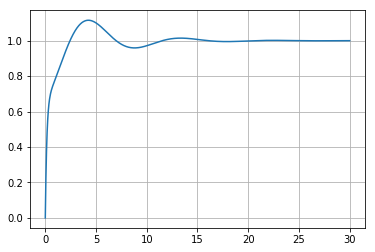

In [17]:
t = np.linspace(0, 30, 1000)
y, T = step(sys, t)
plt.plot(T, y)
plt.grid()
plt.show()

In [18]:
print(np.sum((target-y)**2))

8.172674110927227


In [19]:
from skopt import gp_minimize
from skopt.plots import partial_dependence, plot_convergence, plot_evaluations, plot_objective

In [20]:
def objective(params):
    numd_iter = params
    dend_iter = [1., 0]
    H_iter = tf(numd_iter, dend_iter)
    
    target = 1.
    sys_iter = feedback(H_iter*G, target)
    
    y_iter, _= step(sys_iter, t)
    loss = np.sum((target-y_iter)**2)
    return loss

space  = [(0., 5.), (0., 5.), (0., 5.)]
K = [np.random.rand(),
     np.random.rand(),
     np.random.rand()]

res = gp_minimize(objective, space, x0=K, n_calls=30)
print(res.fun)
print(res.x)

1.3973589606116872
[4.828871515920394, 5.0, 5.0]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fad0220a080>,
      dtype=object)

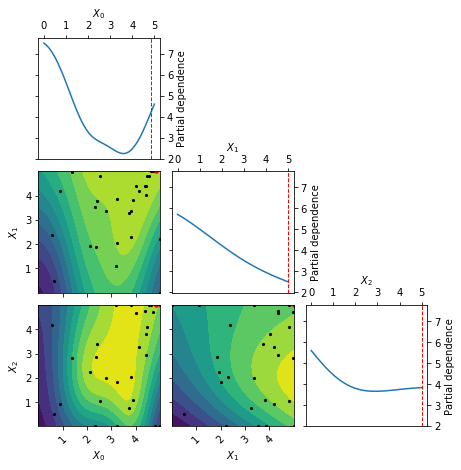

In [21]:
plot_objective(res)


   4.829 s^2 + 5 s + 5
-------------------------
0.2 s^3 + 0.5 s^2 + 0.2 s



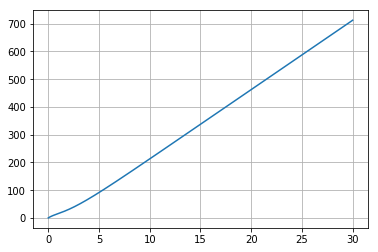

In [22]:
sys_res = tf(res.x, [1., 0]) * G
print(sys_res)
y_res, T_res = step(sys_res, t)
plt.plot(T_res, y_res)
plt.grid()
plt.show()